# Lab 7: Regression

## What you have to do

1. Pick a data set. You can choose one from [Kaggle](https://www.kaggle.com/), or [Data World](https://data.world/). Here are some examples:
    * [College Basketball](https://www.kaggle.com/andrewsundberg/college-basketball-dataset)
    * [College Football](https://www.kaggle.com/braydenrogowski/college-football-offensive-stats-20102020/)
    * [Car MPG](https://www.amac.xyz/courses/m240/labs/car_efficiency.csv)
    * [Area vs Price](https://www.amac.xyz/courses/m240/labs/area_price.csv)
2. Do a linear regression using the following three method:
    *  Minimizing the error with gradient descnet
    * Find the exact minimum by solving a linear system
    * Use the linear regression function from scipy/sklearn
3. Do a quadratic regression using any method you want
4. Predict 2 values


**To read the file use the following command:**

```python
import pandas as pd
df = pd.read_csv("car_efficiency.csv") # read the csv file and put the data into the data frame df
values = df.values # puit all the values of the data frame into an array values, where the first column is x and the second colum is y
x = values[:,0]
y = values[:,1]
```

In [1]:
# Import matplotlib libraries for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline

# Import NumPy and Pandas for data manipulation and analysis
import numpy as np
import pandas as pd

# Import SciPy for scientific computing functions, and its linear algebra submodule
import scipy as sci
import scipy.linalg as la

# Import SymPy for symbolic mathematics
import sympy as sp

# Import scikit-learn modules for machine learning tasks
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("lin-reg-data.csv")

X, Y = df.iloc[:, 1].values, df.iloc[:, 2].values


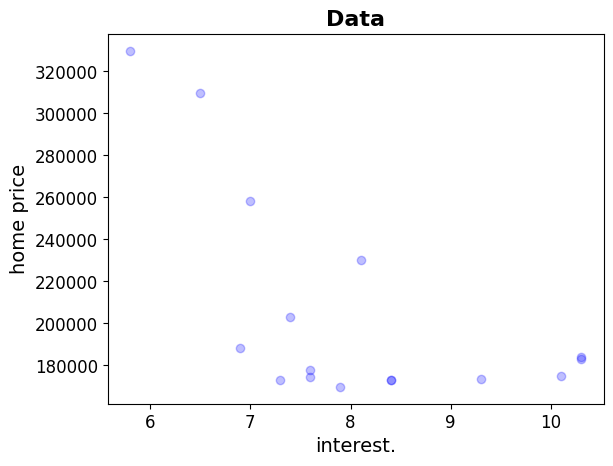

In [3]:
plt.scatter(X, Y, color="blue", alpha=0.25)

plt.title('Data', fontsize=16, fontweight='bold')
plt.xlabel('interest.', fontsize=14)
plt.ylabel('home price', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()


## Scaling

In [6]:
# scaler = MinMaxScaler()

# X = scaler.fit_transform(X.reshape(-1, 1)).flatten()
# Y = scaler.fit_transform(Y.reshape(-1, 1)).flatten()


In [ ]:
# plt.scatter(X, Y, color="blue", alpha=0.25)

# plt.title('Scaled Spotify and YouTube Data', fontsize=16, fontweight='bold')
# plt.xlabel('Scaled Views', fontsize=14)
# plt.ylabel('Scaled Stream', fontsize=14)
# plt.tick_params(labelsize=12)
# plt.show()


In [46]:
n = len(X) # not used i think

def error_linear(f):
    return np.average(np.sum(Y - (X * f[0] + f[1]))**2)

def grad_linear(f):
    dm = np.average((-2) * np.sum(X * (Y - (f[0] * X + f[1]))))
    db = np.average((-2) * np.sum(Y - (f[0] * X + f[1])))
    return np.array([dm, db])


def grad_descent(grad, x0, tol = 1e-9, itmax = 1000, a = 0.01):
  """
  Solves the system of equations f(x) = 0 using gradient descent.

  Args:
    grad: The gradient of f.
    x0: The initial guess for the solution.
    tol: The tolerance for convergence.
    itmax: The maximum number of iterations.
    a: The learning rate.

  Returns:
    x, | grad(f(x)) |, iterations
  """
  x = x0.copy()
  for i in range(itmax):
    dx = -a * grad(x)
    x += dx
    if np.allclose(grad(x), 0, atol=tol, rtol=tol): # or np.allclose(dx, 0, atol=tol, rtol=tol):
      break

  return x, np.linalg.norm(grad(x)), i+1


In [ ]:

def grad_descent_with_condition(grad, x0, tol=1e-9, itmax=1000, a=0.01):
    """
    Solves the system of equations f(x) = 0 using gradient descent, with the condition to multiply a by 0.5
    if the function value or the norm of the gradient does not decrease at every iteration.

    Args:
        grad: The gradient of f.
        x0: The initial guess for the solution.
        tol: The tolerance for convergence.
        itmax: The maximum number of iterations.
        a: The learning rate.

    Returns:
        x (numpy array): The estimated solution.
        norm_grad (float): The norm of the gradient at the estimated solution.
        iterations (int): The number of iterations taken.
    """
    x = x0.copy()
    f_prev = np.inf
    norm_grad_prev = np.inf
    for i in range(itmax):
        dx = -a * grad(x)
        x += dx
        f = np.linalg.norm(dx)
        norm_grad = np.linalg.norm(grad(x))
        if f > f_prev or norm_grad > norm_grad_prev:
            a *= 0.5
        f_prev = f
        norm_grad_prev = norm_grad
        if np.allclose(grad(x), 0, atol=tol, rtol=tol):
            break
    return x, np.linalg.norm(grad(x)), i+1




import numpy as np


def gradient_descent_with_condition(f, grad_f, x0, alpha=0.1, eps=1e-5, max_iters=1000):
    """
    Gradient descent method with the condition to multiply alpha by 1/2 if the value of the gradient
    or the function does not decrease at every iteration.

    Args:
        f (function): the objective function to minimize.
        grad_f (function): the gradient function of f.
        x0 (numpy array): the initial guess for the minimum.
        alpha (float): the step size or learning rate. Default is 0.1.
        eps (float): the tolerance for the stopping criterion based on the norm of the gradient. Default is 1e-5.
        max_iters (int): the maximum number of iterations. Default is 1000.

    Returns:
        x (numpy array): the estimated minimum.
        f_values (list): the function values at each iteration.
    """
    x = x0.copy()
    f_values = [f(x)]
    for i in range(max_iters):
        grad = grad_f(x)
        x_new = x - alpha * grad
        f_new = f(x_new)
        if f_new < f_values[-1] and np.linalg.norm(grad) < np.linalg.norm(grad_f(x_new)):
            x = x_new
            f_values.append(f_new)
        else:
            alpha = alpha * 0.5
        if np.linalg.norm(grad) < eps:
            break
    return x, f_values


In [74]:
guess = np.array([12000.0, 10000.0])
coeffs, grad, i = grad_descent(grad_linear, guess, a = 1e-4, itmax = 2000)


In [75]:
# grad_linear(guess)

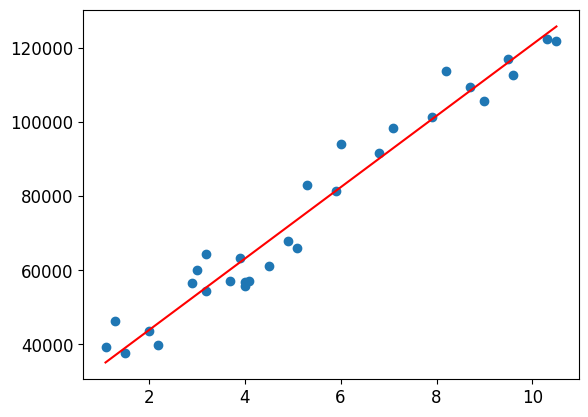

In [76]:
plt.scatter(X, Y)
plt.plot(X, coeffs[0]*X + coeffs[1], color="red")

plt.title('', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()


In [85]:
print(
    f"Slope = {coeffs[0]}\nIntercept = {coeffs[1]}\nNorm of Gradient = {grad}\nIterations: {i}")


Slope = 9635.155865402015
Intercept = 24544.230059374924
Norm of Gradient = 16011.949277940137
Iterations: 2000


In [78]:
# Error
e = error_linear(coeffs)
print(f"Error = {e}")

# Gradient of root
print(f"Gradient = {np.linalg.norm(grad_linear(root))}")


Error = 62714572.41254917
Gradient = 16011.949277940137


In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
x, y = df.iloc[:, 0].values, df.iloc[:, 1].values
reg = LinearRegression().fit(x[:, np.newaxis], y)


In [80]:
reg.

SyntaxError: invalid syntax (607747085.py, line 1)

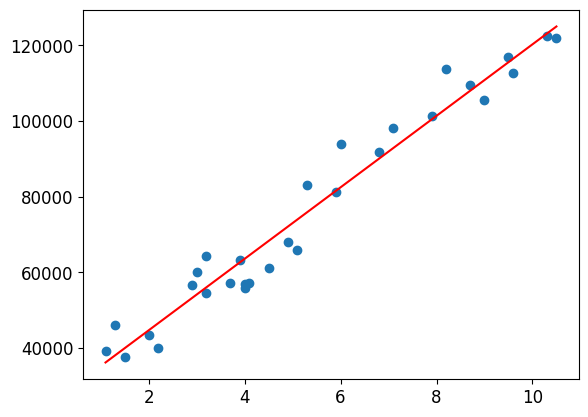

In [81]:
plt.scatter(X, Y)
plt.plot(X, reg.coef_*X + reg.intercept_, color="red")

plt.title('', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()


In [82]:
np.average(np.sum(Y - (X*reg.co + root[1]))**2)


AttributeError: 'LinearRegression' object has no attribute 'co'

In [83]:
root

array([ 9635.1558654 , 24544.23005937])

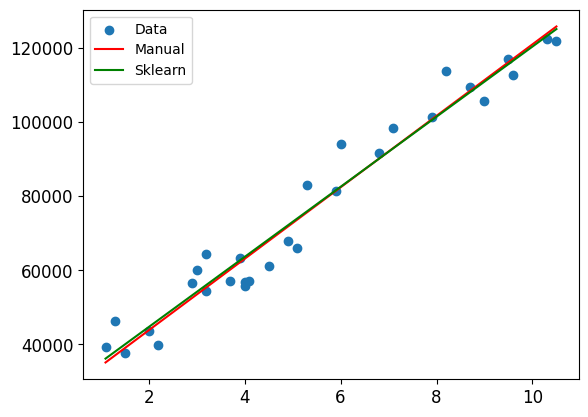

In [95]:
plt.scatter(X, Y)
plt.plot(X, coeffs[0]*X + coeffs[1], color="red", label = "Manual")
plt.plot(X, reg.coef_*X + reg.intercept_, color="green", label = "Sklearn")

plt.title('', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(["Data", "Manual", "Sklearn"])
plt.show()


In [88]:
coeffs[0]*12 + coeffs[1]


140166.1004441991

In [87]:
coeffs

array([ 9635.1558654 , 24544.23005937])

In [90]:
plt.savefig('question3.png')

<Figure size 640x480 with 0 Axes>

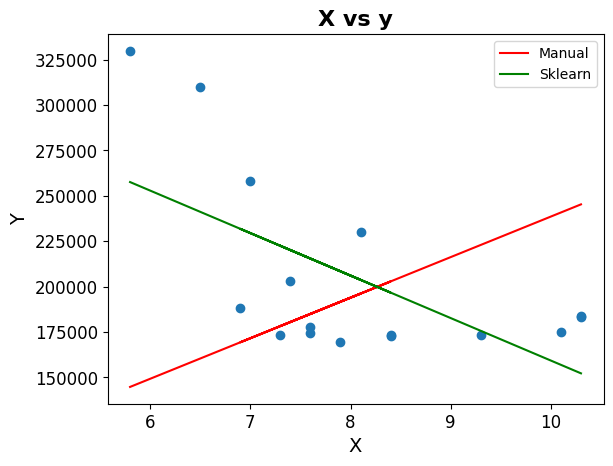

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import scipy.linalg as la
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





def grad_linear(f):
    d = np.array([-2*np.dot(X, Y - (f[0]*X + f[1])),
                  -2*np.sum(Y - (f[0]*X + f[1]))])
    return d / len(X)


def grad_descent(grad, x0, tol=1e-9, itmax=1000, a=0.01):
    x = x0.copy()
    for i in range(itmax):
        dx = -a * grad(x)
        x += dx
        if np.allclose(grad(x), 0, tol):
            break
    return x, np.linalg.norm(grad(x)), i+1


guess = np.array([12000.0, 10000.0])
coeffs, grad, i = grad_descent(grad_linear, guess, a=1e-4, itmax=2000)

reg = LinearRegression().fit(X[:, np.newaxis], Y)

plt.scatter(X, Y)
for label, color, model in [("Manual", "red", coeffs), ("Sklearn", "green", [reg.coef_[0], reg.intercept_])]:
    plt.plot(X,
             model[0]*X + model[1], color=color, label=label)
plt.title('X vs y', fontsize=16, fontweight='bold')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()


In [97]:
coeffs


array([11607.41890011, 11253.67347142])

In [6]:
print(
    f"Slope = {coeffs[0]}\nIntercept = {coeffs[1]}\nNorm of Gradient = {grad}\nIterations: {i}")


Slope = 22342.366048002677
Intercept = 15165.310066900865
Norm of Gradient = 19330.42955637079
Iterations: 2000


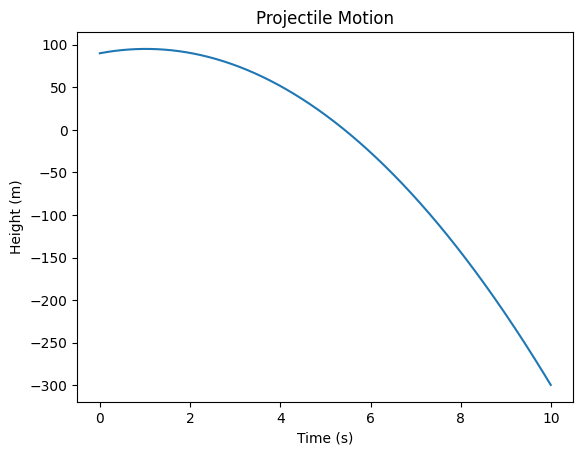

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# constants
g = 9.81  # acceleration due to gravity (m/s^2)
dt = 0.01  # time step (s)

# initial conditions
y0 = 90.0  # initial height (m)
v0 = +10.0  # initial velocity (m/s)
theta = np.pi/4  # launch angle (radians)

# calculate initial velocity components
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

# initialize arrays
t = np.arange(0, 10, dt)
y = np.zeros_like(t)
v = np.zeros_like(t)
ay = np.zeros_like(t)

# set initial values
y[0] = y0
v[0] = v0
ay[0] = -g

# perform Euler-Richardson algorithm
for i in range(1, len(t)):
    # calculate y and v at midpoint
    y_mid = y[i-1] + v[i-1]*0.5*dt
    v_mid = v[i-1] + ay[i-1]*0.5*dt

    # calculate acceleration at midpoint
    ay_mid = -g

    # update y and v using Euler-Richardson algorithm
    y[i] = y[i-1] + v_mid*dt
    v[i] = v[i-1] + ay_mid*dt

    # update acceleration
    ay[i] = -g

# plot results
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion')
plt.show()


In [4]:
y

array([ 2.00000000e+01,  2.00995095e+01,  2.01980380e+01,  2.02955855e+01,
        2.03921520e+01,  2.04877375e+01,  2.05823420e+01,  2.06759655e+01,
        2.07686080e+01,  2.08602695e+01,  2.09509500e+01,  2.10406495e+01,
        2.11293680e+01,  2.12171055e+01,  2.13038620e+01,  2.13896375e+01,
        2.14744320e+01,  2.15582455e+01,  2.16410780e+01,  2.17229295e+01,
        2.18038000e+01,  2.18836895e+01,  2.19625980e+01,  2.20405255e+01,
        2.21174720e+01,  2.21934375e+01,  2.22684220e+01,  2.23424255e+01,
        2.24154480e+01,  2.24874895e+01,  2.25585500e+01,  2.26286295e+01,
        2.26977280e+01,  2.27658455e+01,  2.28329820e+01,  2.28991375e+01,
        2.29643120e+01,  2.30285055e+01,  2.30917180e+01,  2.31539495e+01,
        2.32152000e+01,  2.32754695e+01,  2.33347580e+01,  2.33930655e+01,
        2.34503920e+01,  2.35067375e+01,  2.35621020e+01,  2.36164855e+01,
        2.36698880e+01,  2.37223095e+01,  2.37737500e+01,  2.38242095e+01,
        2.38736880e+01,  